In [21]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
from IPython.display import display, clear_output
import PIL.Image
from tifffile import TiffWriter

import sys, os
sys.path.append(os.path.join(sys.path[0], '../tauSWIRcamera')) 
from tauSWIRcamera import tauSWIRcamera

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
hostname = '129.123.5.125'
port = 4000
cam = tauSWIRcamera(hostname, port, "MASTER")
cameraFolder = cam.name

## START CAMERA SETUP ##
1. Analog mode set to: DISABLED
2. External Sync Mode set to: MASTER
3. AGC set to: MANUAL
4. Auto-Exposure set to: DISABLED
5. CMOS bit depth set to: 14-BITS
6. Camera Link bit depth set to: 14-BITS
7. Integration mode set to: UNRESTRICTED
8. FPA Set Point Temperature set to: 20oC
9. Settings set as Power-on Default
## CAMERA SETUP COMPLETED ##


In [57]:
cam.setFPS(60)
cam.setIntTime(2)

Frame rate set to: 60
Int. Time set to: 1.99ms


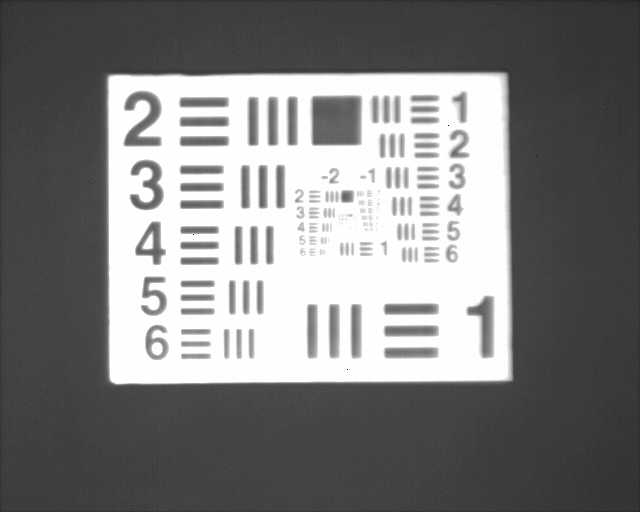

In [59]:
# Define buffer size
buffer_size = 1  
frame_buffer = []

try:
    while True:
        # Capture frame-by-frame
        frames = cam.collectFrame(buffer_size)
        # Iterate through each frame in the stack
        for index, frame in enumerate(frames):
            # Convert 14-bit to 8-bit for displaying
            frame = (frame >> 6).astype(np.uint8)
            # Append frame to buffer
            frame_buffer.append(frame)
            
            # If buffer exceeds the defined size, remove the oldest frame
            if len(frame_buffer) > buffer_size:
                frame_buffer.pop(0)
            
            # Display frames in the buffer
            for f in frame_buffer:
                img = PIL.Image.fromarray(f)
                display(img)
                clear_output(wait=True)
        
except KeyboardInterrupt:
    pass
finally:
    cv2.destroyAllWindows()

## Save the Image

/var/folders/t5/1zdfp4m52kqbs2csdsp2625c0000gn/T/ipykernel_9983/2626309142.py:6: DeprecationWarning: <tifffile.TiffWriter.save> is deprecated. Use TiffWriter.write
  imglist.save(frames, contiguous=True, subfiletype=2)


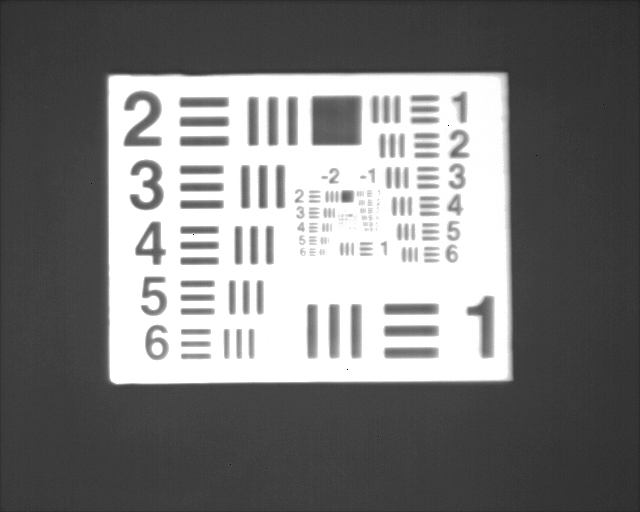

In [56]:
filename = "test"

# Save Image
frames = cam.collectFrame(100)
imglist= TiffWriter(f'images/{filename}.tif')
imglist.save(frames, contiguous=True, subfiletype=2)
imglist.close()

# Display Image
frames = (frames >> 6).astype(np.uint8)
img = PIL.Image.fromarray(frames[0,:,:],mode="L")
display(img)
# Save Png Image
img.save(f'images/{filename}.png') 
